# Prosper Loan Dataset Explanation

#### This notebook explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, ...etc.

In [8]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import os
import glob
import pandas as pd
import seaborn as sb
%matplotlib inline

# some more libraries to plot graph
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot, plot

# To establish connection
init_notebook_mode(connected = True)

import plotly.graph_objs as go

In [9]:
df= pd.read_csv('prosperLoanData.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [11]:
pd.set_option("display.max_columns",None)
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [13]:
# a method to loop over certain columns to obtain their value_counts

list1 = ["LoanStatus","EmploymentStatus","Occupation","IsBorrowerHomeowner","CurrentlyInGroup","Recommendations","BorrowerState","ProsperRating (Alpha)",'Term']
for i in list1:
  print(i,'\n',df[i].value_counts())
  print('  ')

LoanStatus 
 Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64
  
EmploymentStatus 
 Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64
  
Occupation 
 Other                          28617
Professional                   13628
Computer Programmer             4478
Executive                       4311
Teacher                         3759
                               ...  
Dentist                           68
Student - College Freshman        41
Student - Communi

In [14]:
# using the same list to determine the number of unique values in them.
for i in list1:
  print(i,len(df[i].unique()))
  print('  ')

LoanStatus 12
  
EmploymentStatus 9
  
Occupation 68
  
IsBorrowerHomeowner 2
  
CurrentlyInGroup 2
  
Recommendations 17
  
BorrowerState 52
  
ProsperRating (Alpha) 8
  
Term 3
  


# Univariate Exploration

### What is the status of the majority of Loans?

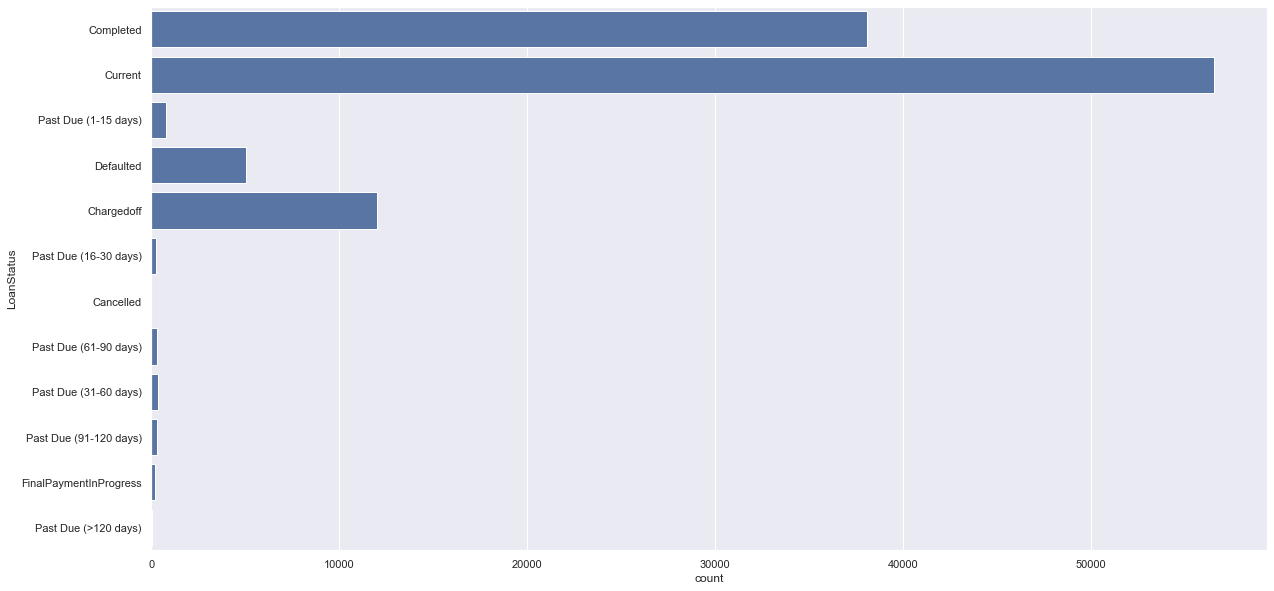

In [15]:
plt.figure(figsize=[20,10]);

sb.countplot(data=df, y='LoanStatus', color='b');
#plt.xticks(rotation=30);

### What is the employment status for most of the borrowers ?

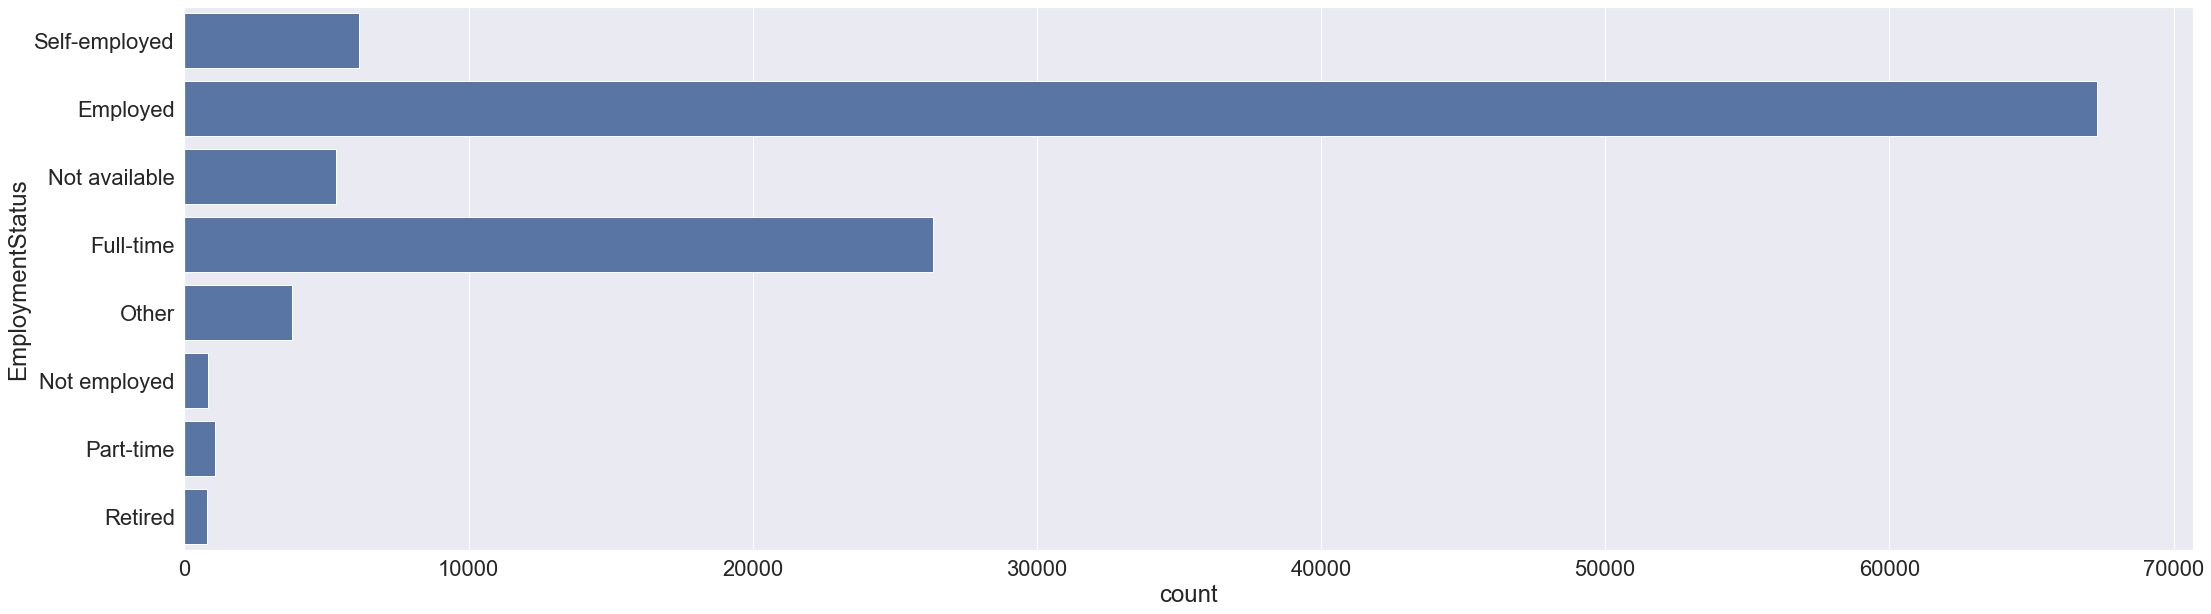

In [16]:
plt.figure(figsize=[36,10]);
sb.set(font_scale = 2);
sb.countplot(data=df, y='EmploymentStatus', color='b');


##### Most borrowers are employed

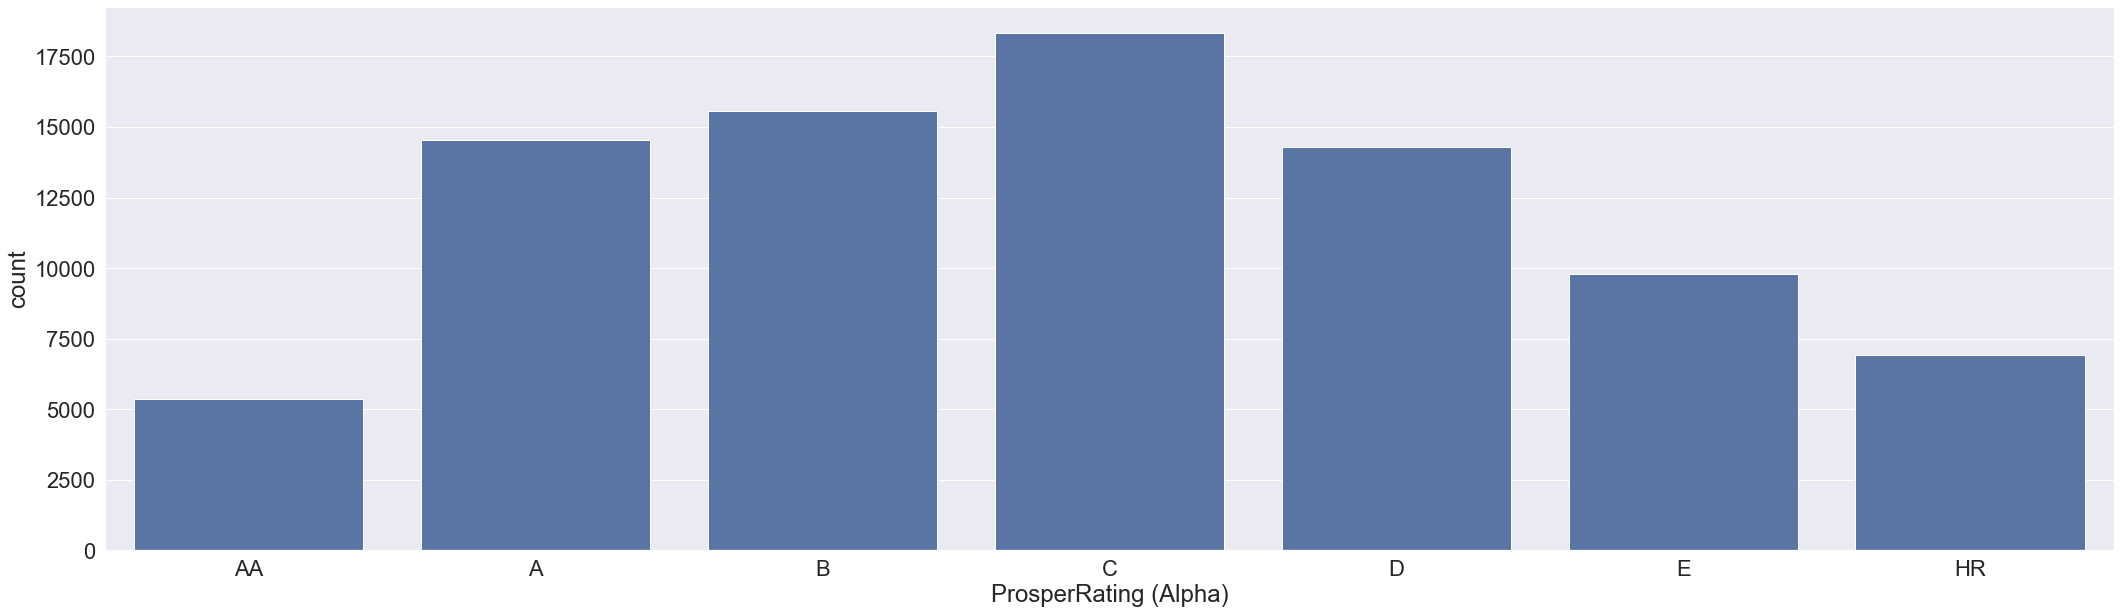

In [22]:
#set ratings in order
ratings_order=['AA','A','B','C','D','E','HR'];

plt.figure(figsize=[36,10]);
sb.set(font_scale = 2);
sb.countplot(data=df, x='ProsperRating (Alpha)', color='b', order= ratings_order);

#### propser rating 'C' has the highest number of borrowers

### Do borrowers own a house?

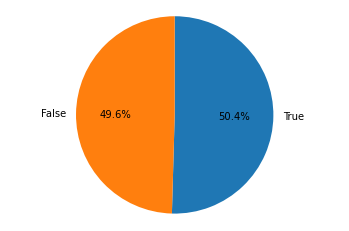

In [21]:
sort1=df['IsBorrowerHomeowner'].value_counts()
plt.pie(sort1, labels = sort1.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.axis('equal');

##### Almost half the borrowers own a hourse while the other half don't.

### Are these borrowers in a group?


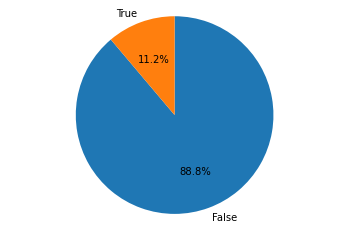

In [22]:
sort2=df['CurrentlyInGroup'].value_counts()
plt.pie(sort2, labels = sort2.index, startangle = 90, counterclock = False, autopct='%1.1f%%');
plt.axis('equal');

##### almost 89% of the borrowers are currently in a group

### Where are borrowers mostly from ?

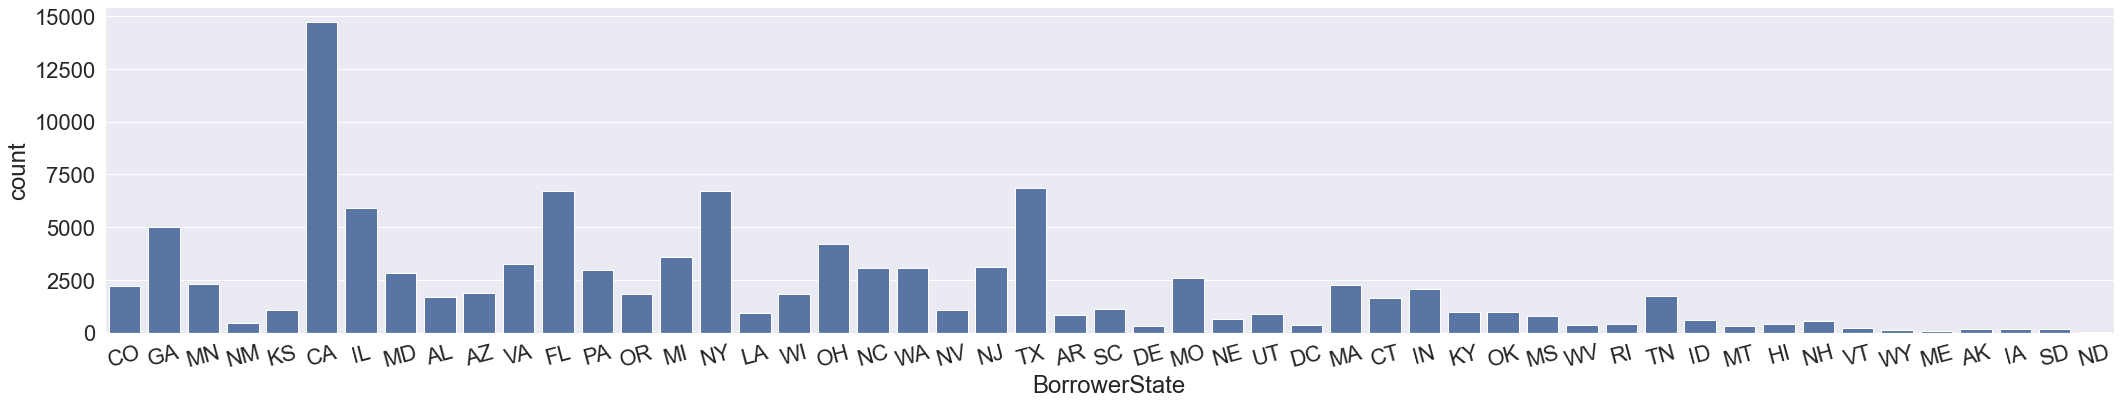

In [76]:
plt.figure(figsize=[36,6]);
sb.set(font_scale = 2);
sb.countplot(data=df, x='BorrowerState', color='b');
plt.xticks(rotation=15);

##### It seems that California has the highest number of borrowers.

### Which category is the loans needed for?

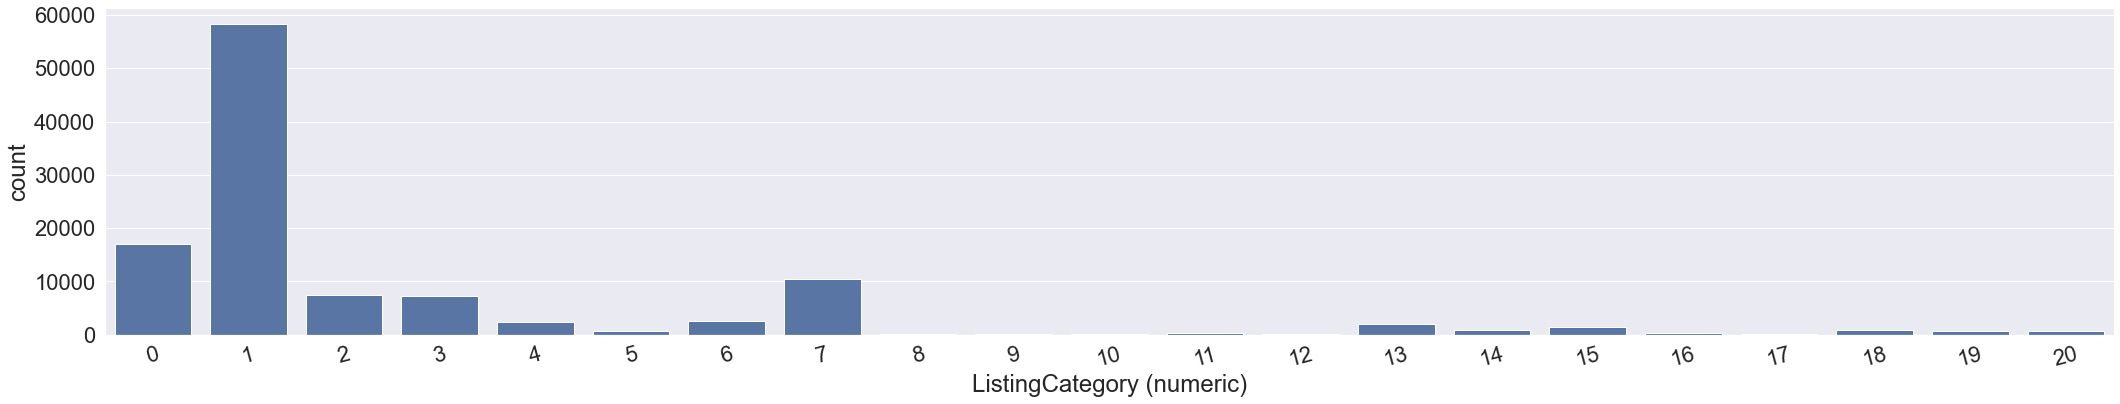

In [89]:
plt.figure(figsize=[36,6]);
sb.set(font_scale = 2);
sb.countplot(data=df, x='ListingCategory (numeric)', color='b');
plt.xticks(rotation=15);

##### more than 55,000 loans were borrowed for Debt consolidation

# Bivariate Exploration

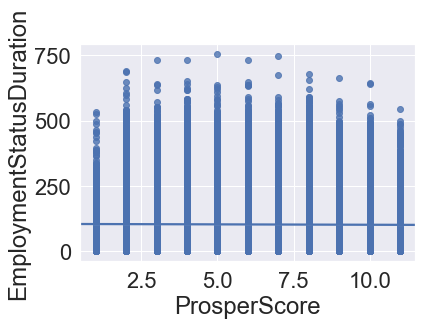

In [312]:
# Scatter plot
sb.regplot(data = df, x = 'ProsperScore', y = 'EmploymentStatusDuration', truncate= False);

In [25]:
#Preparatory Step 1 - Convert the "VClass" column from a plain object type into an ordered categorical type
#plt.figure(figsize=[8,5])
# Types of prosperratings
ProsperRating_classes = ratings_order

PR_alpha = pd.api.types.CategoricalDtype(ordered=True, categories=ProsperRating_classes)

# Use pandas.astype() to convert the column from a plain object type into an ordered categorical type 
df['ProsperRating (Alpha)'] = df['ProsperRating (Alpha)'].astype(PR_alpha);


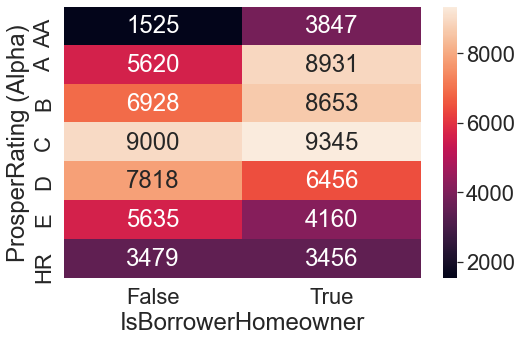

In [31]:


# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
PR_counts = df.groupby(['ProsperRating (Alpha)', 'IsBorrowerHomeowner']).size()

# Use Series.reset_index() to convert a series into a dataframe object
PR_counts =PR_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
PR_counts = PR_counts.pivot(index = 'ProsperRating (Alpha)', columns = 'IsBorrowerHomeowner', values = 'count')

#Step 2 - Plot the heatmap
plt.figure(figsize=[8,5])
sb.heatmap(PR_counts,annot = True, fmt = 'd');

#### Type C ProsperRating has the highest number of homeowners.

In [306]:
df.Occupation.nunique()

67

In [32]:
# Example 2. Plot a Heat Map between two qualitative variables
#Step 1 - Get the data into desirable format - a DataFrame

# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
PR_counts2 = df.groupby(['ProsperRating (Alpha)', 'CurrentlyInGroup']).size()

# Use Series.reset_index() to convert a series into a dataframe object
PR_counts2 =PR_counts2.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have PR class on rows
PR_counts2 = PR_counts2.pivot(index = 'ProsperRating (Alpha)', columns = 'CurrentlyInGroup', values = 'count')

#Step 2 - Plot the heatmap
plt.figure(figsize=[8,5])
sb.heatmap(PR_counts2,annot = True, fmt = 'd');

##### Type C ProsperRating has the highest number of borrowers currently in group.

In [94]:
# Types of sedan cars
EmploymentStatus_classes = [ 'Employed','Full-time','Self-employed','Not available','Other','Part-time','Not employed','Retired']

# Returns the types for sedan_classes with the categories and orderedness
# Refer - https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.api.types.CategoricalDtype.html
ES_alpha = pd.api.types.CategoricalDtype(ordered=True, categories=EmploymentStatus_classes)

# Use pandas.astype() to convert the "VClass" column from a plain object type into an ordered categorical type 
df['EmploymentStatus'] = df['EmploymentStatus'].astype(ES_alpha);

In [315]:
# Use group_by() and size() to get the number of cars and each combination of the two variable levels as a pandas Series
ES_counts = df.groupby(['EmploymentStatus', 'IsBorrowerHomeowner']).size()

# Use Series.reset_index() to convert a series into a dataframe object
ES_counts =ES_counts.reset_index(name='count')

# Use DataFrame.pivot() to rearrange the data, to have vehicle class on rows
ES_counts = ES_counts.pivot(index = 'EmploymentStatus', columns = 'IsBorrowerHomeowner', values = 'count')

#Step 2 - Plot the heatmap
plt.figure(figsize=[8,5])
sb.heatmap(ES_counts,annot = True, fmt = 'd');

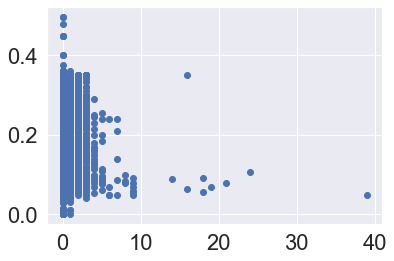

In [318]:
 plt.scatter(data = df, x = 'Recommendations', y = 'BorrowerRate');

### Is there a relationship between employment status and borrower rate?

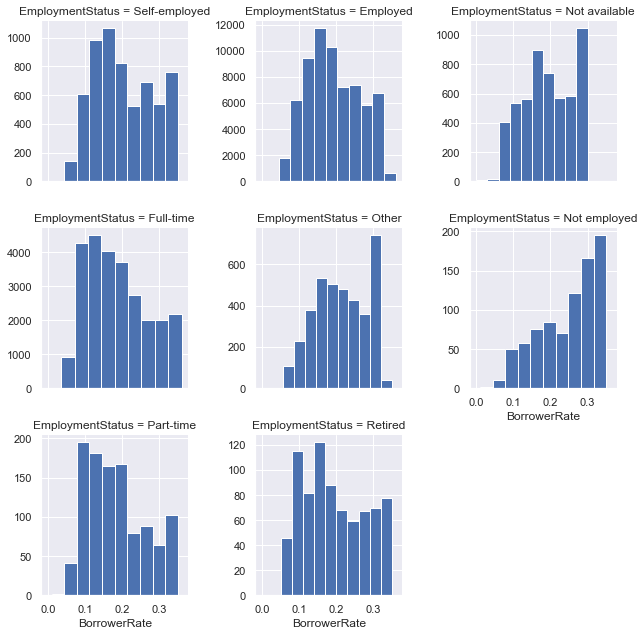

In [135]:

sb.set(font_scale=1);
g = sb.FacetGrid(data = df, col = 'EmploymentStatus', col_wrap=3, sharey=False);
g.map(plt.hist,'BorrowerRate');

#### Employed borrowers have the highest borrower rate

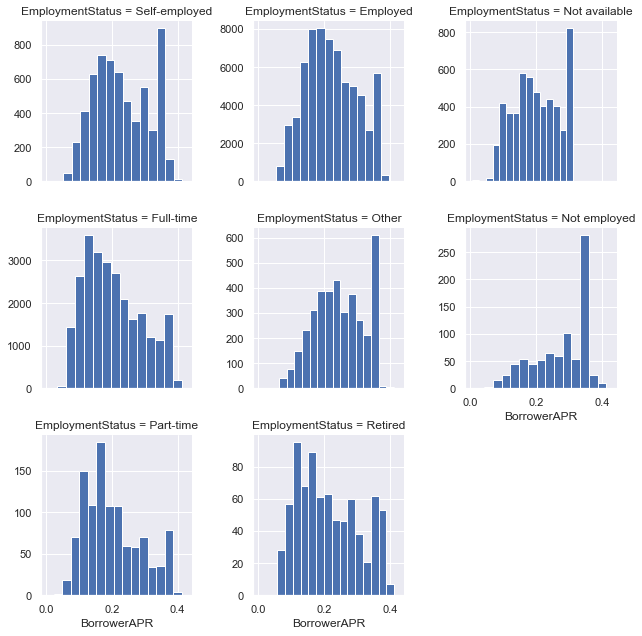

In [373]:
sb.set(font_scale=1);
g = sb.FacetGrid(data = df, col = 'EmploymentStatus', col_wrap=3, sharey=False);
g.map(plt.hist,'BorrowerAPR',bins=15);

#### Employed Borrowers have the highest Borrower APR

In [340]:
sb.set(font_scale=1);
g = sb.FacetGrid(data = df, col = 'EmploymentStatus', col_wrap=3, sharey=False);
g.map(plt.hist,'TotalTrades',bins=10);

#### Employed borrowers have the highest number of trades.

## From where most Borrowers come from ?

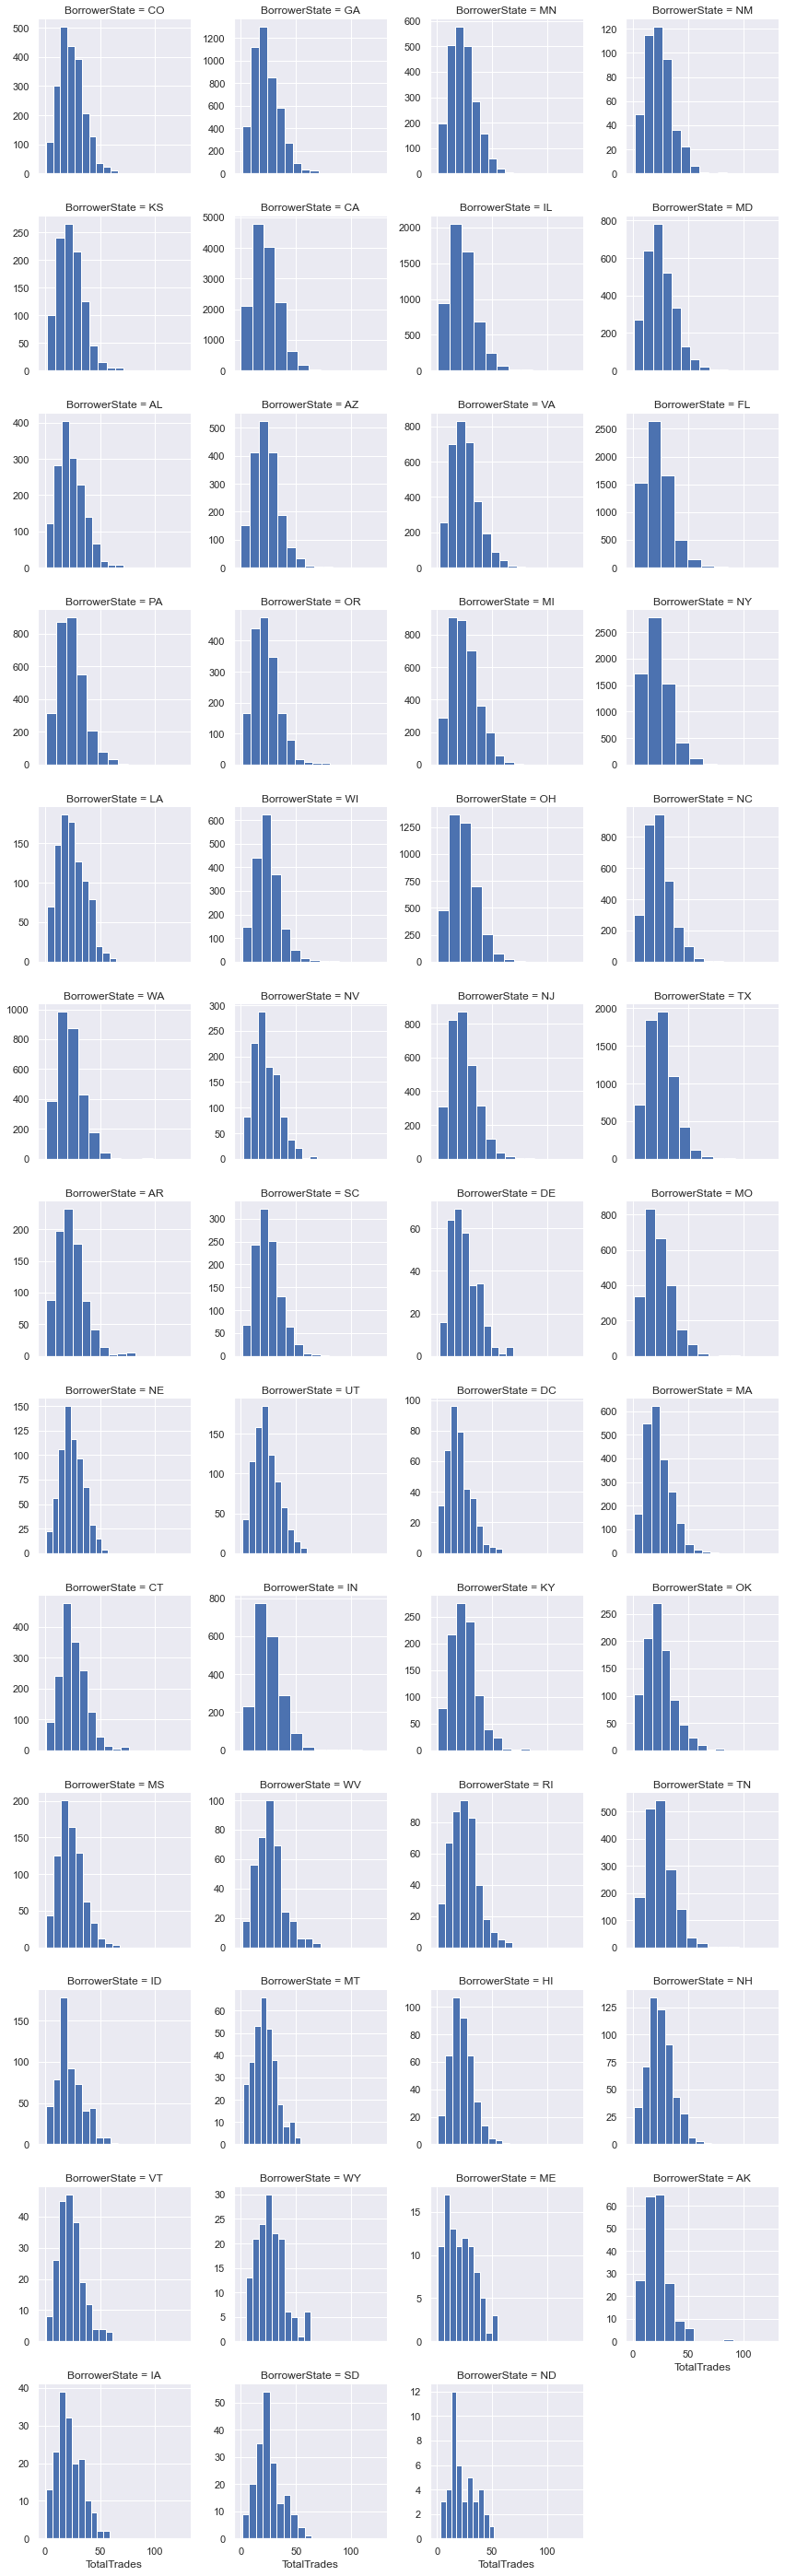

In [341]:
sb.set(font_scale=1);
g = sb.FacetGrid(data = df, col = 'BorrowerState', col_wrap=4, sharey=False);
g.map(plt.hist,'TotalTrades');

In [28]:
# type defined is choropleth to
# plot geographical plots
data = dict(type = 'choropleth',
  
            # location: sorted states "alphabetically"
            locations = sorted(df.dropna(subset=['BorrowerState']).BorrowerState.unique()),
              
            # States of USA
            locationmode = 'USA-states',
              
            # colorscale can be added as per requirement
            #colorscale = 'mako_r',
              
            z = df.BorrowerState.value_counts().sort_index(),
            colorbar = {'title': 'Borrowers numbers from each state'})
              
layout = dict(geo ={'scope': 'usa'})
  
# passing data dictionary as a list 
choromap = go.Figure(data = [data], layout = layout)
  
# plotting graph
iplot(choromap)

#### This plot shows that Colorado has the highest number of borrowers.

In [87]:
df.BorrowerState.value_counts()
# This proves that the USA map is correct

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

In [19]:
df.BorrowerState.sort_index().value_counts()

CA    14717
TX     6842
NY     6729
FL     6720
IL     5921
GA     5008
OH     4197
MI     3593
VA     3278
NJ     3097
NC     3084
WA     3048
PA     2972
MD     2821
MO     2615
MN     2318
MA     2242
CO     2210
IN     2078
AZ     1901
WI     1842
OR     1817
TN     1737
AL     1679
CT     1627
SC     1122
NV     1090
KS     1062
KY      983
OK      971
LA      954
UT      877
AR      855
MS      787
NE      674
ID      599
NH      551
NM      472
RI      435
HI      409
WV      391
DC      382
MT      330
DE      300
VT      207
AK      200
SD      189
IA      186
WY      150
ME      101
ND       52
Name: BorrowerState, dtype: int64

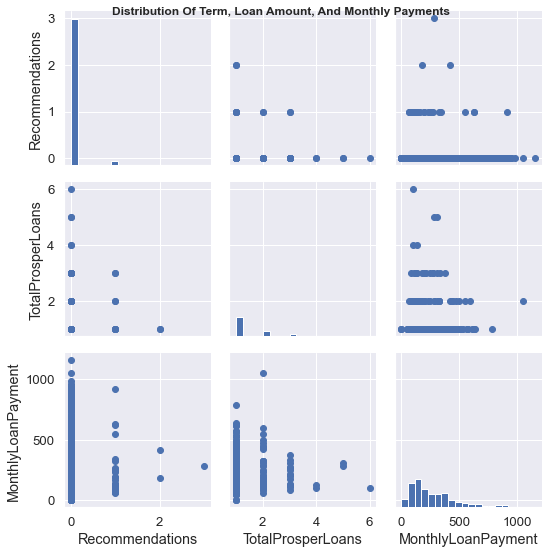

In [51]:
# set numeric vars from numeric coulmns for scatter plot
numeric_vars = ['Recommendations', 'TotalProsperLoans', 'MonthlyLoanPayment']
samples = np.random.choice(df.shape[0], 1000, replace = False);
df_samp = df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);
# add title
plt.suptitle('Distribution of Term, Loan Amount, and Monthly Payments'.title(), y = 1,
            fontsize = 12, weight = 'bold')


#optimize distance between subplots
plt.show()

In [54]:
df.TotalInquiries.describe()

count    112778.000000
mean          5.584405
std           6.429946
min           0.000000
25%           2.000000
50%           4.000000
75%           7.000000
max         379.000000
Name: TotalInquiries, dtype: float64

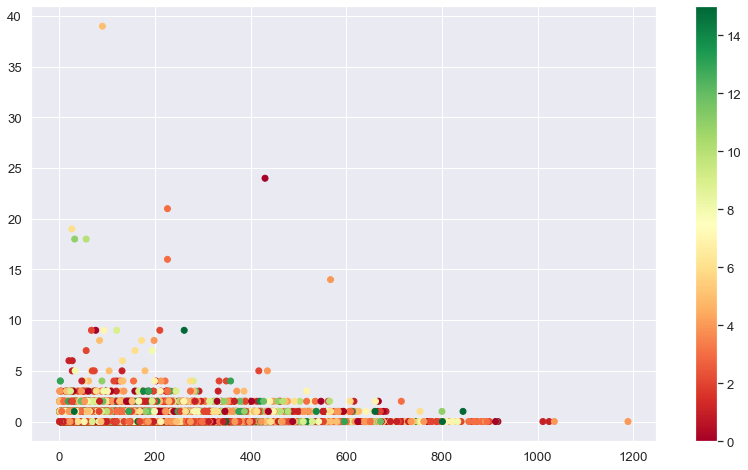

In [57]:
plt.figure(figsize=[14,8])

plt.scatter(data = df.query('TotalInquiries<TotalInquiries.quantile(0.95)')
            , x = 'Investors', y = 'Recommendations', c = 'TotalInquiries'
           , cmap='RdYlGn' );
plt.colorbar();

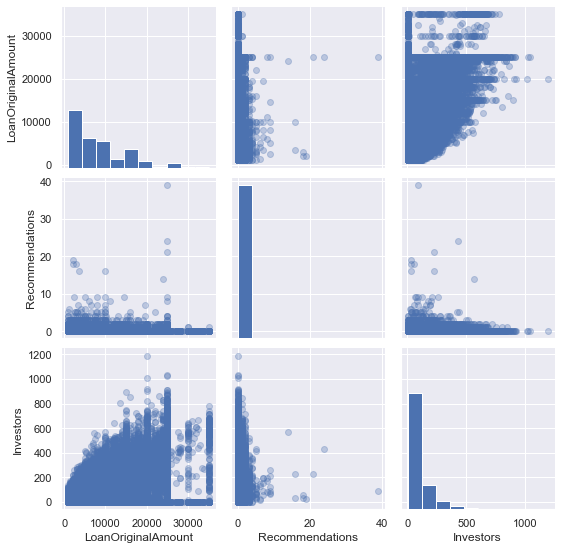

In [357]:
g = sb.PairGrid(data = df, vars = ['LoanOriginalAmount', 'Recommendations', 'Investors']);
g.map_diag(plt.hist,bins=10);
g.map_offdiag(plt.scatter,alpha=0.3);

#### There is a positive realtionship between the number of investors and the amount of loan

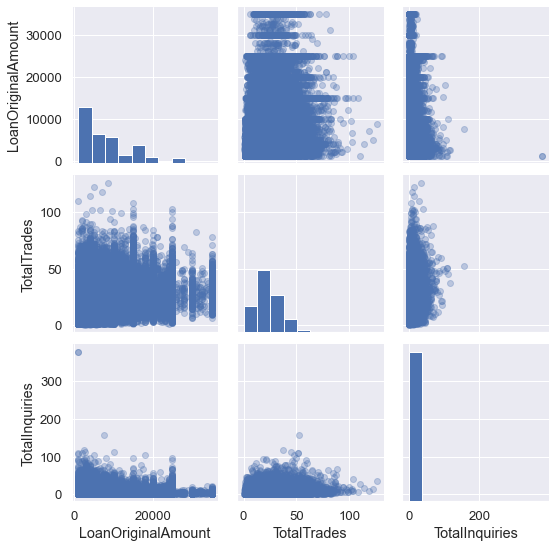

In [59]:
g = sb.PairGrid(data = df, vars = ['LoanOriginalAmount', 'TotalTrades', 'TotalInquiries']);
g.map_diag(plt.hist,bins=10);
g.map_offdiag(plt.scatter,alpha=0.3);


## Multivariate exploration

## Summary of Findings

#### The following visuals will elaborate some correlations between the categorical variables (Prosper ratings and employment status) and some of the numerical variables


### We will first observe prosper rating effect on some variables

### The correlation between Prosper ratings and other variables

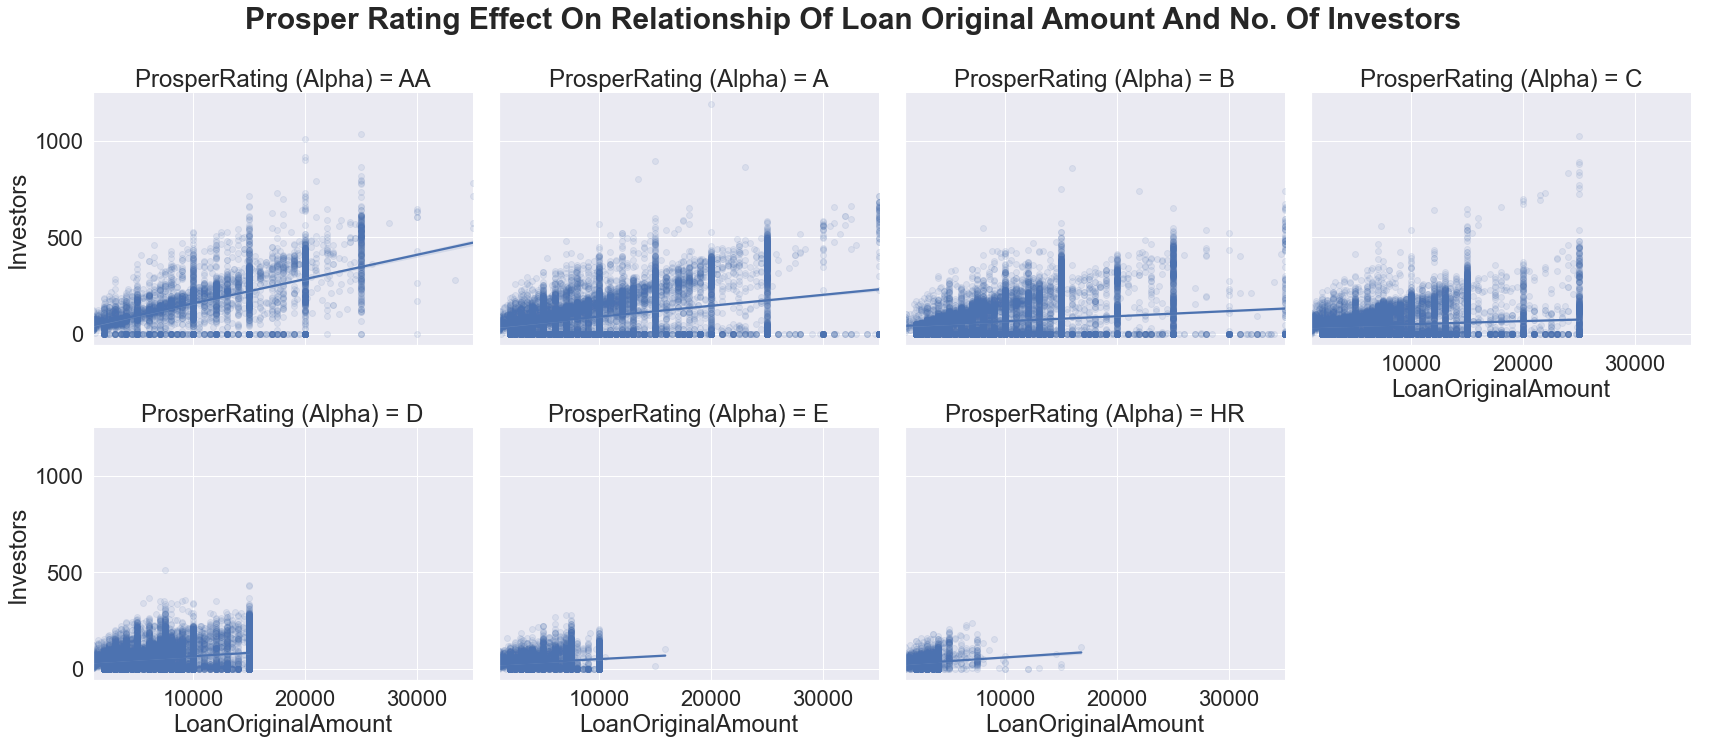

In [64]:
 #Prosper rating effect on relationship of loan original amount and no. of investors
sb.set(font_scale=2);
g=sb.FacetGrid(data=df, aspect=1.2, height=5, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'Investors', scatter_kws={'alpha':0.1});
g.add_legend();
plt.suptitle('Prosper rating effect on relationship of loan original amount and no. of investors'.title(), y = 1.05,
            fontsize = 30, weight = 'bold');

#### It is apparent that ProsperRating type A ,AA & B have the highest loan amounts along with high number of investors

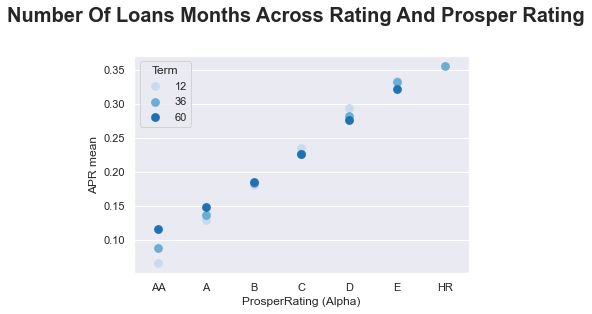

In [26]:
sb.set(font_scale=1);
sb.pointplot(data = df, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'Term',
           palette = 'Blues', linestyles = '');

plt.suptitle('number of loans months across rating and Prosper rating'.title(), y = 1.05,
            fontsize = 20, weight = 'bold');
plt.ylabel('APR mean');

#### We can observe that prosper rating type C has highest interest rate with aveage loan term of 36 months

### Now we explore the employment status effect on some variables

### The correlation between Prosper ratings and other variables

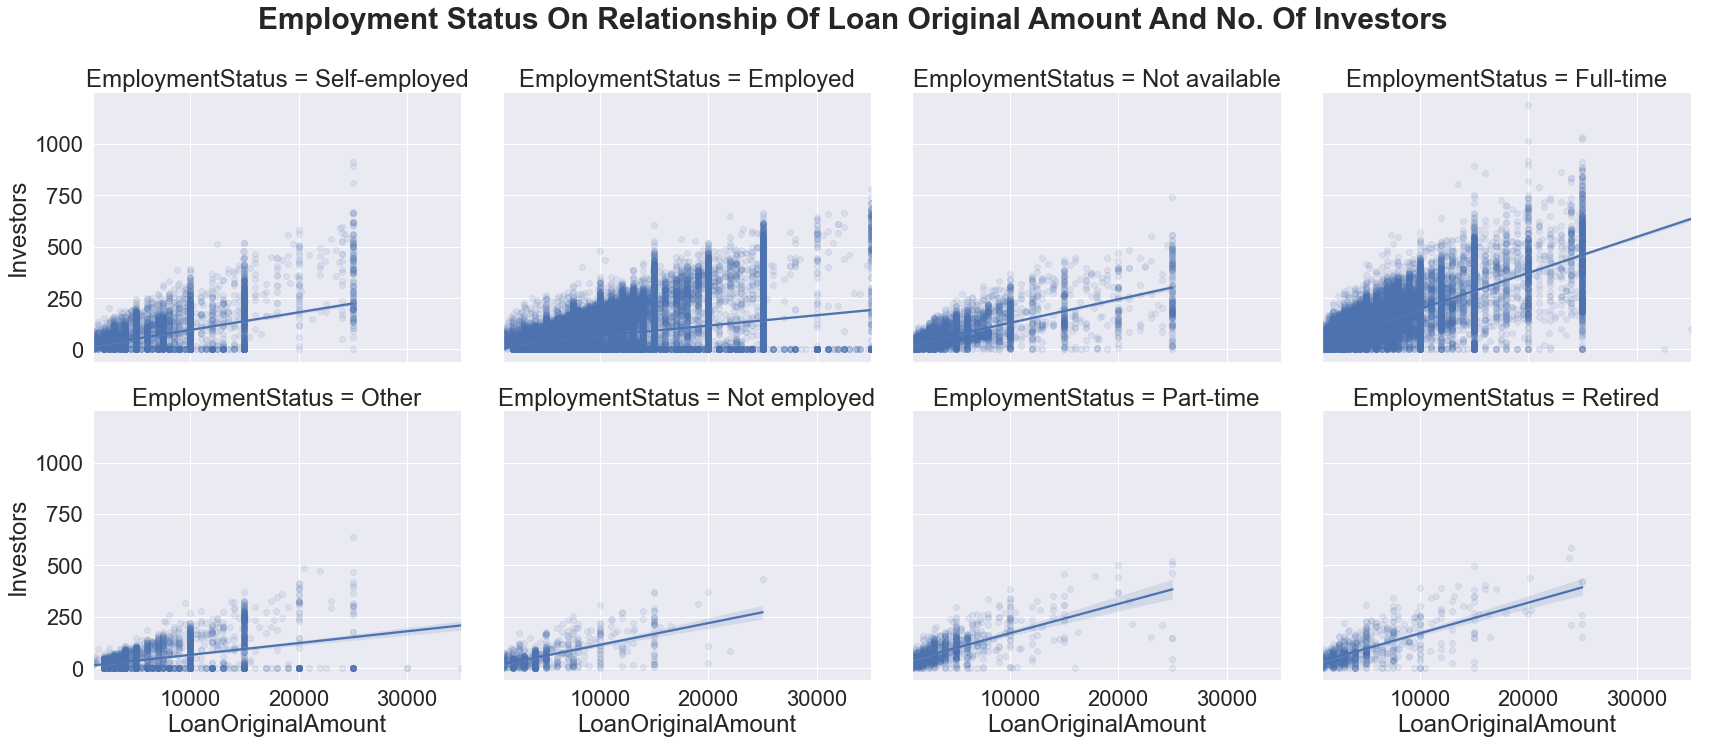

In [65]:
sb.set(font_scale=2);
g=sb.FacetGrid(data=df, aspect=1.2, height=5, col='EmploymentStatus', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'Investors', scatter_kws={'alpha':0.1});
g.add_legend();
plt.suptitle('Employment Status on relationship of loan original amount and no. of investors'.title(), y = 1.05,
            fontsize = 30, weight = 'bold');

#### Borrowers who work full time or employed have the highest amounts of loans but number of investors in full-time borrowers are higher.

In [68]:
plt.figure(figsize=[30,6]);
sb.set(font_scale=2);
ax = sb.barplot(data = df, x = 'EmploymentStatus', y = 'Recommendations', hue = 'IsBorrowerHomeowner');
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'IsBorrowerHomeowner');
plt.suptitle('Home owning across employment status vs. recommendations'.title(), y = 1.05,
            fontsize = 30, weight = 'bold');


#### Part-time borrowers have the highest recommendations.

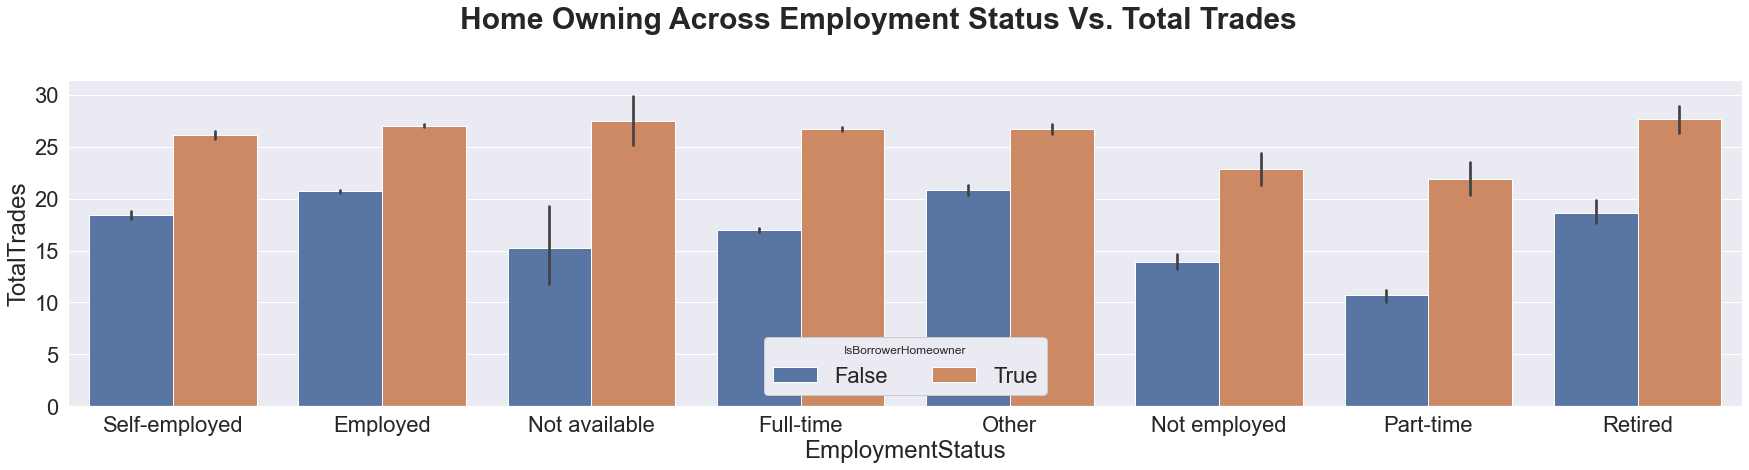

In [66]:
plt.figure(figsize=[30,6]);
sb.set(font_scale=2);
ax = sb.barplot(data = df, x = 'EmploymentStatus', y = 'TotalTrades', hue = 'IsBorrowerHomeowner');
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'IsBorrowerHomeowner');
plt.suptitle('Home owning across employment status vs. total trades'.title(), y = 1.05,
            fontsize = 30, weight = 'bold');

#### Total trades are almost equal between borrowers of different employment status.

# Conclusion

### What affects the borrower’s APR or interest rate?

##### Their employment status and their prosper rating


### Are there differences between loans depending on how large the original loan amount was?

#### Larger original amount ten to have higher number of investors.


### Is there any significant difference between borrowers in terms of their Employment Status?

##### Part-time borrowers have more recommendations, while Employed and Full-time borrowers have higher number of investors.